![titanic](./images/titanic.png)
# Titanic Survivors Analysis

## Overview
This project is to analyze who survived the Titanic accident. A major goal is to use machine learning to see what attributes of the passengers led them to survive the accident. 

## Data Understanding
The data is obtained from Kaggle (https://www.kaggle.com/competitions/titanic/data). The data has 12 columns, and each row consists of survival condition and detailed information of the passenger.

In [1]:
# import dataframe pandas
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# read the data
df = pd.read_csv('data/train.csv')

In [3]:
# display sample data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

There is information for 891 passengers in the data. Some columns will be removed from the analysis.

In [8]:
# number of survived paseengers = 342
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
# ticket class
# 1 is the highest
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
# gender
# I think there are more males due to working condition
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
# number of siblings and spouses
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [12]:
# number of parents and children
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [13]:
# cabin number
df.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
D              3
F33            3
              ..
C86            1
E77            1
E31            1
B41            1
D46            1
Name: Cabin, Length: 147, dtype: int64

In [14]:
# port of embarkation
# C = Cherbourg, Q = Queenstown, S = Southampton
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
# ticket numbers
df.Ticket.value_counts()

1601               7
CA. 2343           7
347082             7
347088             6
3101295            6
                  ..
248723             1
14312              1
S.C./A.4. 23567    1
250648             1
349236             1
Name: Ticket, Length: 681, dtype: int64

It seems some fares are much more expensive.

In [16]:
import matplotlib.pyplot as plt

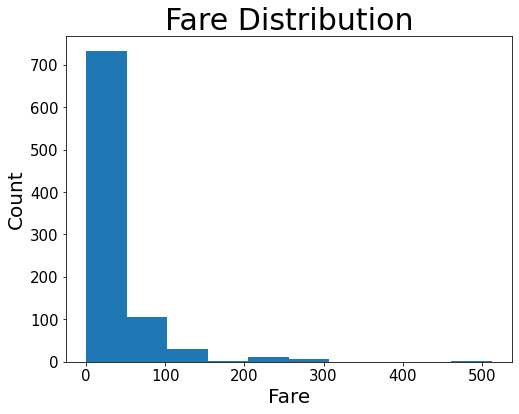

In [17]:
fig, ax = plt.subplots(figsize=(8,6))

ax.hist(df.Fare)

ax.set_title('Fare Distribution', fontsize=30)
ax.set_xlabel('Fare', fontsize=20)
ax.set_ylabel('Count', fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

Age of most passengers is between 20 and 30.

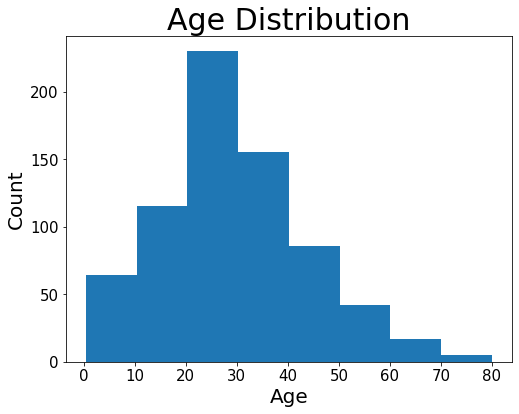

In [18]:
fig, ax = plt.subplots(figsize=(8,6))

ax.hist(df.Age, bins = 8)

ax.set_title('Age Distribution', fontsize=30)
ax.set_xlabel('Age', fontsize=20)
ax.set_ylabel('Count', fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

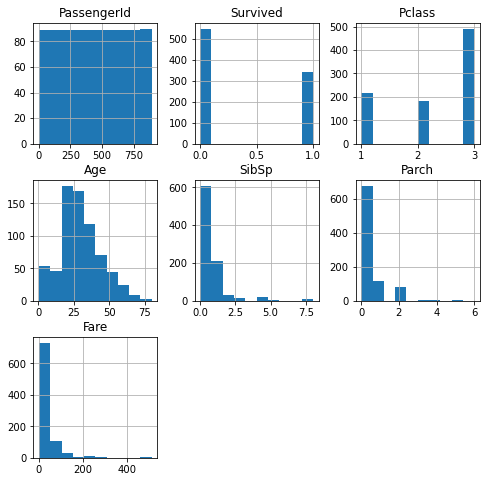

In [19]:
# distribution of other columns
df.hist(figsize  = [8, 8]);

In [33]:
# missing values
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [21]:
df.Age.fillna(df.Age.mean(), inplace=True)

In [22]:
df.Cabin.fillna('N/A', inplace=True)

In [23]:
df.Embarked.fillna('N/A', inplace=True)

In [24]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [25]:
# remove irrelevant variable
df.drop(columns = ["Name", "PassengerId", "Cabin", "Ticket"], inplace=True)

# separate target and features
X = df.drop(columns = ["Survived"])
y = df.Survived

In [26]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [27]:
# import libraries for columns transformation
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [28]:
# split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [29]:
X_train_labeled = X_train.copy()
X_test_labeled = X_test.copy()

# The gender and embarked columns are labeled as numeric values
col = ["Sex", "Embarked"]
for c in col:
    X_train_labeled[c] = le.fit_transform(X_train[c].astype('str'))
    X_test_labeled[c] = le.transform(X_test[c].astype('str'))

## Baseline Models
There will be 5 classification models to make a comparison.

In [30]:
# importing libraries for models and validations
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.metrics import classification_report, mean_squared_error

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

In [31]:
# A function to show results of each model
# This function is saved in a separate coding file. This will save spaces in other python files for better readability.
def scores(X_train, y_train, X_test, y_test, model):

    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    
    baseline_scores = cross_validate(
        estimator=model,
        X=X_train,
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    
    print(model)
    print("")
    print("CV score:     {:.2%}".format(baseline_scores["test_score"].mean()))
    print("X-test score: {:.2%}".format(model.score(X_test, y_test)))
    print("RMSE:         {:.4}".format(mean_squared_error(y_test, y_hat_test, squared=False)))
    print("")
    print("Train score")
    print(classification_report(y_train, y_hat_train))
    
    print("")
    print("")
    print("X-test score")

    print("")
    print(classification_report(y_test, y_hat_test))
    
    print("")
    print("")
    
    pass

In [32]:
lr = LogisticRegression(random_state=1)
scores(X_train_labeled, y_train, X_test_labeled, y_test, lr)

dtc = DecisionTreeClassifier(random_state=1)
scores(X_train_labeled, y_train, X_test_labeled, y_test, dtc)

rfc = RandomForestClassifier(random_state=1)
scores(X_train_labeled, y_train, X_test_labeled, y_test, rfc)

abc = AdaBoostClassifier(random_state=1)
scores(X_train_labeled, y_train, X_test_labeled, y_test, abc)

gbc = GradientBoostingClassifier(random_state=1)
scores(X_train_labeled, y_train, X_test_labeled, y_test, gbc)

LogisticRegression(random_state=1)

CV score:     81.44%
X-test score: 79.37%
RMSE:         0.4542

Train score
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       421
           1       0.76      0.70      0.73       247

    accuracy                           0.81       668
   macro avg       0.80      0.79      0.79       668
weighted avg       0.81      0.81      0.81       668



X-test score

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       128
           1       0.80      0.69      0.74        95

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



DecisionTreeClassifier(random_state=1)

CV score:     79.64%
X-test score: 75.34%
RMSE:         0.4966

Train score
              precision    recall  f1-score   support

           0       0.99      1.00      0.99  

### Baseline Models Results
Gradient Boosting Classifier has the best test score, but we will do this part again after using Smote in part 3. Let's take a look at correlation of each columns in the next step first.